In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data=pd.read_csv('F:/Data science - digital tainee/Data sets/train.csv')

In [69]:
data.iloc[809:812]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.1500,NaN,S


In [6]:
data.shape

(891, 12)

In [9]:
print("Number of passenger are : ",data['Name'].count())

Number of passenger are :  891


In [11]:
val=data['Survived'].unique()
val

array([0, 1], dtype=int64)

C:\Users\Prasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

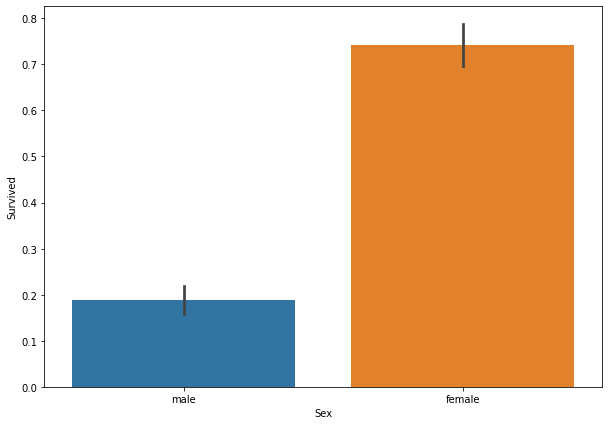

In [17]:
plt.figure(figsize=(10,7))
sns.barplot(data['Sex'],data['Survived'])

In [19]:
data.shape

(891, 12)

In [20]:
data = data.dropna()

In [21]:
data.shape

(183, 12)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [25]:
data=data.drop(['Name','Ticket','Cabin','Embarked'],axis=1)

In [26]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,female,38.0,1,0,71.2833
3,4,1,1,female,35.0,1,0,53.1000
6,7,0,1,male,54.0,0,0,51.8625
10,11,1,3,female,4.0,1,1,16.7000
11,12,1,1,female,58.0,0,0,26.5500


In [27]:
data['Sex']=data['Sex'].map({'male':0,'female':1})      # this to mapping values 0,1 for male and female respectively

In [28]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,1,38.0,1,0,71.2833
3,4,1,1,1,35.0,1,0,53.1000
6,7,0,1,0,54.0,0,0,51.8625
10,11,1,3,1,4.0,1,1,16.7000
11,12,1,1,1,58.0,0,0,26.5500


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(data.drop(['Survived'],axis=1),data['Survived'],
                                                 test_size=0.30,random_state=8)  

In [52]:
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Prasad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
acc=model.score(X_test,Y_test)
acc*100

78.18181818181819

In [58]:
prediction=model.predict(X_test)             #
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
809,810,1,1,33.0,1,0,53.1000
137,138,1,0,37.0,1,0,53.1000
496,497,1,1,54.0,1,0,78.2667
659,660,1,0,58.0,0,2,113.2750
3,4,1,1,35.0,1,0,53.1000


In [59]:
prediction           #https://survival-prediction-api.herokuapp.com/

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [70]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
data['Age'].mean()

29.69911764705882

In [73]:
abc=data[['Sex','Fare']].groupby('Sex').sum()

In [79]:
abc.reset_index(level=0,inplace=True)
abc

,Sex,Fare
0,female,13966.6628
1,male,14727.2865


C:\Users\Prasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Fare'>

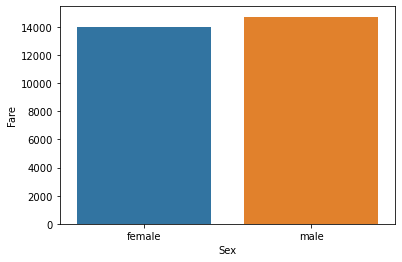

In [81]:
sns.barplot(abc['Sex'],abc['Fare'])

In [82]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
len(data['Age'].unique())

89

In [87]:
data['Age'].min()

0.42

In [112]:
filt1=data['Age']<21
a=data[filt1].head()
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [102]:
filt2=(data['Age']<=40) & (data['Age']>=20)

In [122]:
b=data[filt2]

In [117]:
filt3=data['Age']>40

In [123]:
c=data[filt3]

In [115]:
sns.barplot(data['Survived'],data[filt2])

C:\Users\Prasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [124]:
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [125]:
c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [126]:
b.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
pqr=a[['Survived','Age']].groupby('Survived').count()
pqr.reset_index(level=0,inplace=True)

In [142]:
pqr

,Survived,Age
0,0,3
1,1,2


In [143]:
lmn=b[['Survived','Age']].groupby('Survived').count()
lmn.reset_index(level=0,inplace=True)

In [144]:
lmn

,Survived,Age
0,0,244
1,1,156


In [145]:
xyz=c[['Survived','Age']].groupby('Survived').count()
xyz.reset_index(level=0,inplace=True)

In [146]:
xyz

,Survived,Age
0,0,95
1,1,55


In [188]:
xyz.columns=['Survived','Age>40']

In [189]:
xyz

,Survived,Age>40
0,0,95
1,1,55


In [181]:
pqr.columns=['Survived','Age<20']

In [182]:
pqr

,Survived,Age<20
0,0,3
1,1,2


In [183]:
lmn.columns=['Survived','20<Age<40']

In [184]:
lmn

,Survived,20<Age<40
0,0,244
1,1,156


In [190]:
merge_pqrlmn=pd.merge(pqr,lmn,how='inner',on='Survived')

In [191]:
merge_pqrlmn

,Survived,Age<20,20<Age<40
0,0,3,244
1,1,2,156


In [192]:
merge_age=pd.merge(merge_pqrlmn,xyz,how='inner',on='Survived')

In [193]:
merge_age

,Survived,Age<20,20<Age<40,Age>40
0,0,3,244,95
1,1,2,156,55


In [194]:
x=merge_age['Survived']
y=merge_age[['Age<20','20<Age<40','Age>40']]

<AxesSubplot:xlabel='Survived'>

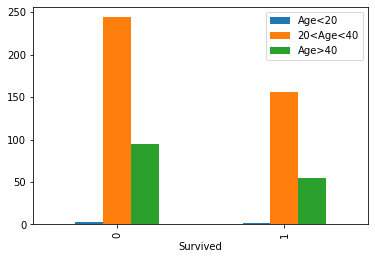

In [195]:
merge_age.plot(x='Survived',y=['Age<20','20<Age<40','Age>40'],kind='bar')

In [196]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
data['Fare'].min()

0.0